In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.contingency_tables import Table2x2
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Ohtani_2023 = pd.read_csv('OHTANI_DATA.csv')
Ohtani_2018 = pd.read_csv("Ohtani_2018.csv")
Ohtani_2020 = pd.read_csv("Ohtani_2020.csv")


In [2]:
Ohtani = pd.read_csv("Ohtani_2018-2023.csv")
Ohtani

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2023-08-23,94.2,-1.98,5.78,"Ohtani, Shohei",687952,660271,NaN,foul,...,2,0,2,Standard,Standard,204.0,0.000,0.000,NaN,NaN
1,ST,2023-08-23,76.1,-2.01,5.74,"Ohtani, Shohei",687952,660271,NaN,swinging_strike,...,2,0,2,Standard,Standard,65.0,0.000,-0.064,NaN,NaN
2,ST,2023-08-23,77.2,-2.05,5.60,"Ohtani, Shohei",687952,660271,NaN,swinging_strike,...,2,0,2,Standard,Standard,69.0,0.000,-0.072,NaN,NaN
3,FS,2023-08-23,90.1,-1.94,5.69,"Ohtani, Shohei",687952,660271,NaN,ball,...,2,0,2,Standard,Standard,317.0,0.000,0.063,NaN,NaN
4,FS,2023-08-23,90.0,-1.83,5.76,"Ohtani, Shohei",687952,660271,NaN,blocked_ball,...,2,0,2,Standard,Standard,191.0,0.000,0.042,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,FF,2018-04-01,98.1,-2.30,6.17,"Ohtani, Shohei",476704,660271,NaN,swinging_strike,...,0,0,0,Standard,Standard,209.0,0.000,-0.026,NaN,NaN
7679,FS,2018-04-01,88.0,-2.12,6.34,"Ohtani, Shohei",543760,660271,strikeout,swinging_strike,...,0,0,0,Standard,Standard,247.0,-0.021,-0.167,NaN,NaN
7680,ST,2018-04-01,83.6,-2.36,6.01,"Ohtani, Shohei",543760,660271,NaN,ball,...,0,0,0,Standard,Standard,120.0,0.000,0.023,NaN,NaN
7681,ST,2018-04-01,81.5,-2.36,6.03,"Ohtani, Shohei",543760,660271,NaN,swinging_strike,...,0,0,0,Standard,Standard,107.0,0.000,-0.051,NaN,NaN


In [3]:
Ohtani['game_date'] = pd.to_datetime(Ohtani['game_date'])

# Create a dictionary to store DataFrames for each year
yearly_data = {}

# Loop through the years 2018 to 2023
for year in range(2018, 2024):
    # Filter the DataFrame for the current year
    mask = (Ohtani['game_date'].dt.year == year)
    yearly_data[year] = Ohtani[mask]
    
    # Optional: Save the DataFrame for the current year to a new CSV file
    yearly_data[year].to_csv(f"Ohtani_{year}.csv", index=False)
    


data_2018 = yearly_data[2018]
data_2019 = yearly_data[2019] ## He didn't play this season
data_2020 = yearly_data[2020]
data_2021 = yearly_data[2021]
data_2022 = yearly_data[2022]
data_2023 = yearly_data[2023]

In [4]:
data_2018 = pd.DataFrame(data_2018)
data_2020 = pd.DataFrame(data_2020)
data_2021 = pd.DataFrame(data_2021)
data_2022 = pd.DataFrame(data_2022)
data_2023 = pd.DataFrame(data_2023)

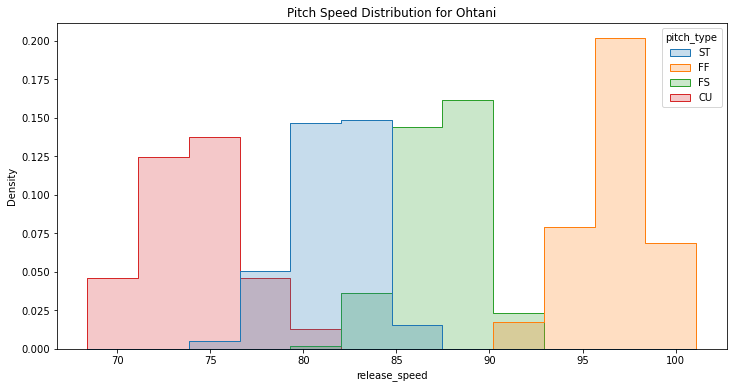

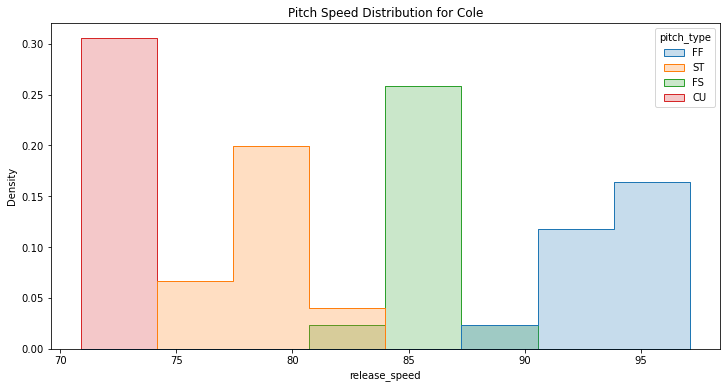

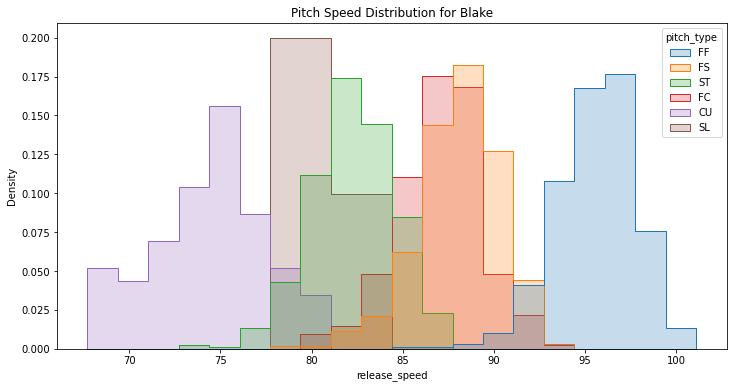

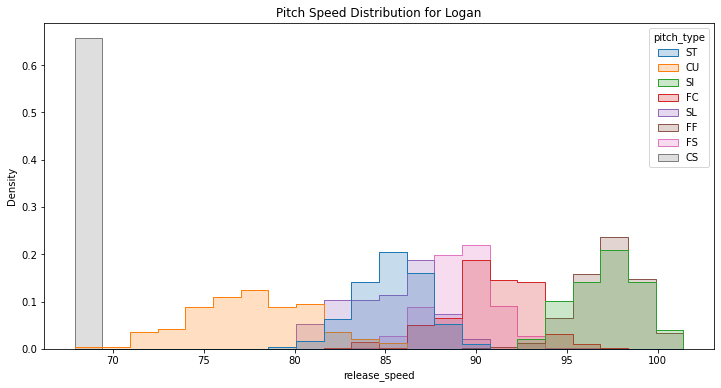

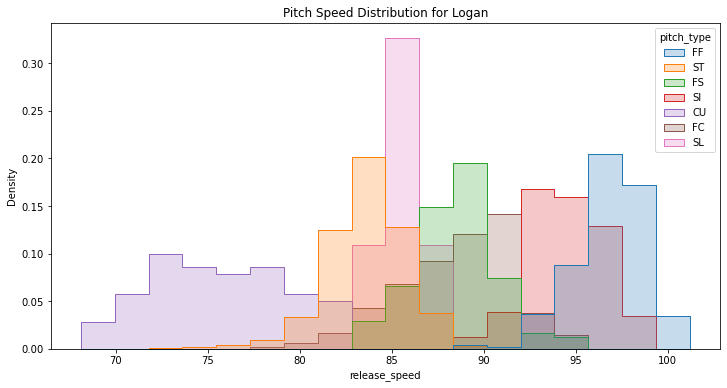

In [5]:

# Distribution of pitch speeds for Ohtani
plt.figure(figsize=(12, 6))
sns.histplot(data_2018 , x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Ohtani')
plt.show()

# Distribution of pitch speeds for Cole
plt.figure(figsize=(12, 6))
sns.histplot(data_2020, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Cole')
plt.show()

# Distribution of pitch speeds for Blake
plt.figure(figsize=(12, 6))
sns.histplot(data_2021, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Blake')
plt.show()

# Distribution of pitch speeds for Logan
plt.figure(figsize=(12, 6))
sns.histplot(data_2022, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Logan')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data_2023, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Logan')
plt.show()


In [15]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

data_frames = {'2018': data_2018, '2020': data_2020, '2021': data_2021, '2022': data_2022, '2023': data_2023}

# Function to update the output based on the dropdown
def view_data(year):
    df = data_frames[year]
    pitch_type_counts = df['pitch_type'].value_counts().reset_index()
    pitch_type_counts.columns = ['Pitch Type', 'Count']
    # Calculate the percentage of each pitch type
    total_pitches = pitch_type_counts['Count'].sum()
    pitch_type_counts['Percentage'] = (pitch_type_counts['Count'] / total_pitches * 100).round(2).astype(str) + '%'
    return pitch_type_counts

# Create a dropdown and output widgets
dropdown = widgets.Dropdown(options=['2018', '2020', '2021', '2022', '2023'], description='Year:')
output = widgets.Output()

# Link the function to changes in the dropdown
def dropdown_eventhandler(change):
    output.clear_output()
    with output:
        display(view_data(change.new))

dropdown.observe(dropdown_eventhandler, names='value')

# Display the widgets
display(dropdown, output)



Dropdown(description='Year:', options=('2018', '2020', '2021', '2022', '2023'), value='2018')

Output()

In [26]:
Ohtani["description"].unique()

array(['foul', 'swinging_strike', 'ball', 'blocked_ball', 'hit_into_play',
       'called_strike', 'swinging_strike_blocked', 'foul_tip',
       'hit_by_pitch', 'foul_bunt', 'missed_bunt'], dtype=object)

In [32]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Define strike and non-strike descriptions
strike_descriptions = ['strike', 'swinging_strike', 'called_strike', 'swinging_strike_blocked', 'foul', 'foul_tip', 'foul_bunt']
non_strike_descriptions = ['ball', 'blocked_ball', 'hit_by_pitch', 'foul_bunt', 'hit_into_play']

data_frames = {'2018': data_2018, '2020': data_2020, '2021': data_2021, '2022': data_2022, '2023': data_2023}

def view_data(year):
    df = data_frames[year]
    pitch_type_counts = df['pitch_type'].value_counts().reset_index()
    pitch_type_counts.columns = ['Pitch Type', 'Count']

    # Calculate the total number of pitches
    total_pitches = pitch_type_counts['Count'].sum()

    # Calculate the percentage of each pitch type
    pitch_type_counts['Percentage'] = (pitch_type_counts['Count'] / total_pitches * 100).round(2).astype(str) + '%'

    # Calculate the strike and non-strike percentages for each pitch type
    strike_percentages = []
    non_strike_percentages = []
    for pitch_type in pitch_type_counts['Pitch Type']:
        pitch_df = df[df['pitch_type'] == pitch_type]
        strike_count = pitch_df[pitch_df['description'].isin(strike_descriptions)]['description'].count()
        non_strike_count = pitch_df[pitch_df['description'].isin(non_strike_descriptions)]['description'].count()
        total_pitch_type_count = pitch_df['description'].count()
        
        strike_percentage = (strike_count / total_pitch_type_count * 100).round(2) if total_pitch_type_count > 0 else 0
        non_strike_percentage = (non_strike_count / total_pitch_type_count * 100).round(2) if total_pitch_type_count > 0 else 0
        
        strike_percentages.append(str(strike_percentage) + '%')
        non_strike_percentages.append(str(non_strike_percentage) + '%')
    
    pitch_type_counts['Strike Percentage'] = strike_percentages
    pitch_type_counts['Non-Strike Percentage'] = non_strike_percentages

    return pitch_type_counts

# Create a dropdown and output widgets
dropdown = widgets.Dropdown(options=['2018', '2020', '2021', '2022', '2023'], description='Year:')
output = widgets.Output()

# Link the function to changes in the dropdown
def dropdown_eventhandler(change):
    output.clear_output()
    with output:
        display(view_data(change.new))

dropdown.observe(dropdown_eventhandler, names='value')

# Display the widgets
display(dropdown, output)




Dropdown(description='Year:', options=('2018', '2020', '2021', '2022', '2023'), value='2018')

Output()

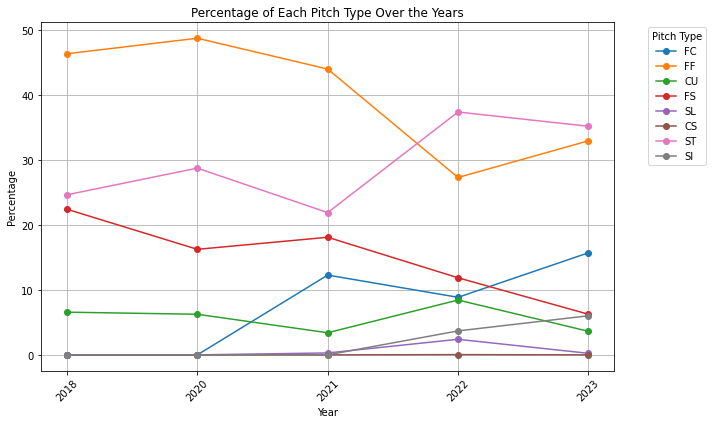

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data structure assumed
data_frames = {'2018': data_2018, '2020': data_2020, '2021': data_2021, '2022': data_2022, '2023': data_2023}

# Create an empty DataFrame to hold the contingency table
contingency_table = pd.DataFrame()

# Get a complete list of all pitch types across all years
all_pitch_types = set()
for df in data_frames.values():
    all_pitch_types.update(df['pitch_type'].dropna().unique())  # Drop nan values
all_pitch_types = list(all_pitch_types)

# Initialize the contingency table with zeros for all years and pitch types
years = list(data_frames.keys())
contingency_table = pd.DataFrame(0, index=years, columns=all_pitch_types)

# Process each year's data
for year, df in data_frames.items():
    pitch_counts = df['pitch_type'].value_counts()  # Get the counts of each pitch type for the current year
    for pitch_type, count in pitch_counts.items():
        contingency_table.at[year, pitch_type] = count

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
for pitch_type in contingency_table_percentage.columns:
    plt.plot(contingency_table_percentage.index, contingency_table_percentage[pitch_type], label=pitch_type, marker='o')

plt.title('Percentage of Each Pitch Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Pitch Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

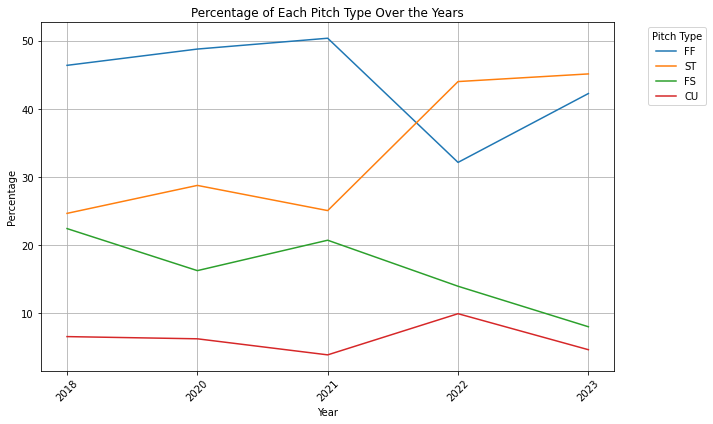

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data structure assumed
data_frames = {'2018': data_2018, '2020': data_2020, '2021': data_2021, '2022': data_2022, '2023': data_2023}

# Create an empty DataFrame to hold the contingency table
contingency_table = pd.DataFrame()

# Process each year's data
for year, df in data_frames.items():
    pitch_counts = df['pitch_type'].value_counts()  # Get the counts of each pitch type for the current year
    contingency_table[year] = pitch_counts

# Transpose the contingency table to have years as rows and pitch types as columns
contingency_table = contingency_table.T

# Fill missing values with zeros
contingency_table.fillna(0, inplace=True)

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
for pitch_type in contingency_table_percentage.columns:
    plt.plot(contingency_table_percentage.index, contingency_table_percentage[pitch_type], label=pitch_type)

plt.title('Percentage of Each Pitch Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Pitch Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




/Users/vyvo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


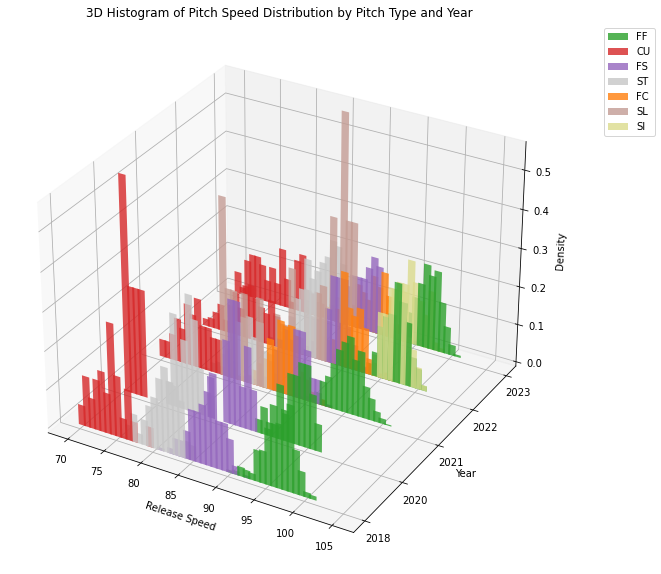

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_histogram(pitchers):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    bins = np.linspace(70, 105, 50)

    all_pitch_types = set()
    for df in pitchers.values():
        all_pitch_types.update(df['pitch_type'].unique())
    all_pitch_types = list(all_pitch_types)

    # Create a color map for pitch types
    color_palette = plt.get_cmap('tab20')
    pitch_type_colors = {pt: color_palette(i / len(all_pitch_types)) for i, pt in enumerate(all_pitch_types)}

    plotted_labels = set()  # Keep track of plotted labels to avoid duplicates

    for i, (year, df) in enumerate(pitchers.items()):
        for pitch_type in all_pitch_types:
            subset = df[df['pitch_type'] == pitch_type]
            if not subset.empty:
                hist, edges = np.histogram(subset['release_speed'], bins=bins, density=True)
                centers = (edges[:-1] + edges[1:]) / 2
                if np.any(hist) and not np.isnan(hist).all():  # Only plot if histogram has non-zero values and is not all NaN
                    ax.bar(centers, hist, zs=i, zdir='y', alpha=0.8, width=1.0,
                           color=pitch_type_colors[pitch_type], label=f'{pitch_type}' if pitch_type not in plotted_labels else "")
                    plotted_labels.add(pitch_type)  # Add the pitch type to the set

    ax.set_xlabel('Release Speed')
    ax.set_ylabel('Year')
    ax.set_zlabel('Density')
    ax.set_yticks(range(len(pitchers)))
    ax.set_yticklabels(pitchers.keys())
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

    plt.title('3D Histogram of Pitch Speed Distribution by Pitch Type and Year')
    plt.show()

# Plot the 3D histogram
plot_3d_histogram(pitchers)